In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
parkinson_data = pd.read_csv("/content/drive/MyDrive/parkinsons_updrs.csv")
parkinson_data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [4]:
parkinson_data = np.random.rand(100, 20)

In [5]:
parkinson_data_train, parkinson_data_test = train_test_split(parkinson_data, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
parkinson_data_train = scaler.fit_transform(parkinson_data_train)
parkinson_data_test = scaler.transform(parkinson_data_test)

In [7]:
input_dim = parkinson_data_train.shape[1]
encoding_dim = 10

In [8]:
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoder)

In [9]:
autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder)

In [10]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(parkinson_data_train, parkinson_data_train, epochs=50, batch_size=32, shuffle=True, validation_data=(parkinson_data_test ,parkinson_data_test ))

Epoch 1/50
3/3 [==============================] - 1s 87ms/step - loss: 1.2226 - val_loss: 1.3871
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 1.2178 - val_loss: 1.3829
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 1.2135 - val_loss: 1.3788
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 1.2091 - val_loss: 1.3747
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 1.2048 - val_loss: 1.3707
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 1.2004 - val_loss: 1.3667
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 1.1963 - val_loss: 1.3627
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 1.1920 - val_loss: 1.3588
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 1.1879 - val_loss: 1.3549
Epoch 10/50
3/3 [==============================] - 0s 26ms/step - loss: 1.1837 - val_loss: 1.3509
Epoch 11/50
3/3 [============

In [11]:
encoder_model = tf.keras.models.Model(inputs=input_layer, outputs=encoder)
encoded_parkinson_data_train = encoder_model.predict(parkinson_data_train)
encoded_parkinson_data_test = encoder_model.predict(parkinson_data_test)

1/1 [==============================] - 0s 21ms/step


In [12]:
reconstruction_loss = autoencoder.evaluate(parkinson_data,parkinson_data)
print("Reconstruction Loss (MSE):", reconstruction_loss)

4/4 [==============================] - 0s 3ms/step - loss: 0.1004
Reconstruction Loss (MSE): 0.10038095712661743


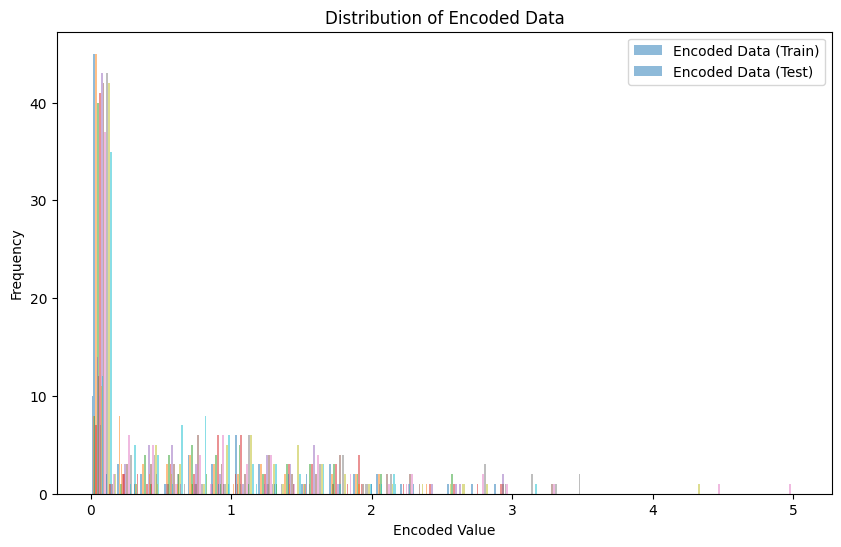

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(encoded_parkinson_data_train, bins=30, alpha=0.5, label='Encoded Data (Train)')
plt.hist(encoded_parkinson_data_test, bins=30, alpha=0.5, label='Encoded Data (Test)')
plt.xlabel('Encoded Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Encoded Data')
plt.show()

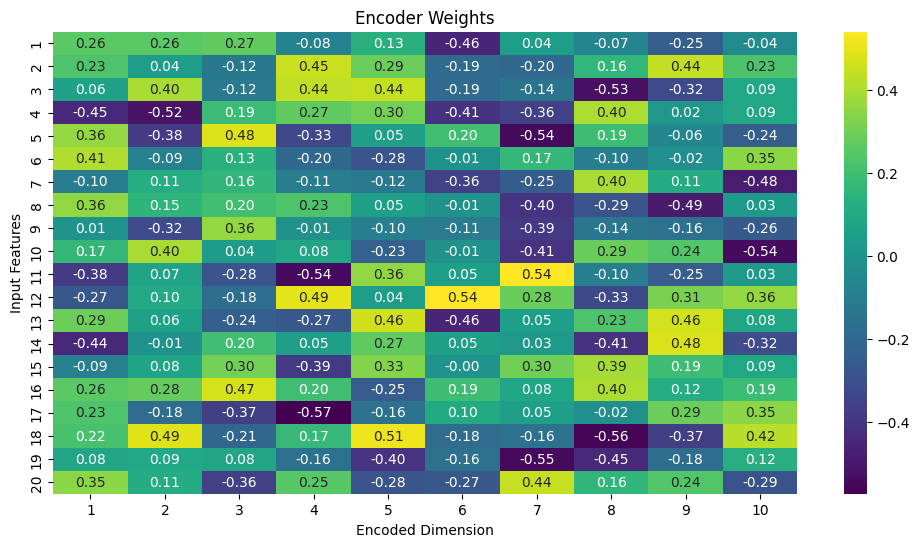

In [14]:
encoder_layer = autoencoder.layers[1]
encoder_weights = encoder_layer.get_weights()[0]
plt.figure(figsize=(12, 6))
sns.heatmap(encoder_weights, cmap='viridis', annot=True, fmt=".2f", xticklabels=range(1, encoding_dim + 1), yticklabels=range(1, input_dim + 1))
plt.xlabel('Encoded Dimension')
plt.ylabel('Input Features')
plt.title('Encoder Weights')
plt.show()